# Assignment: PCA Implementation

# Objective:
- The objective of this assignment is to implement PCA on a given dataset and analyse the results.

# Instructions:
- Download the wine dataset from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Wine).
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

# Deliverables:
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

# Additional Information:
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.

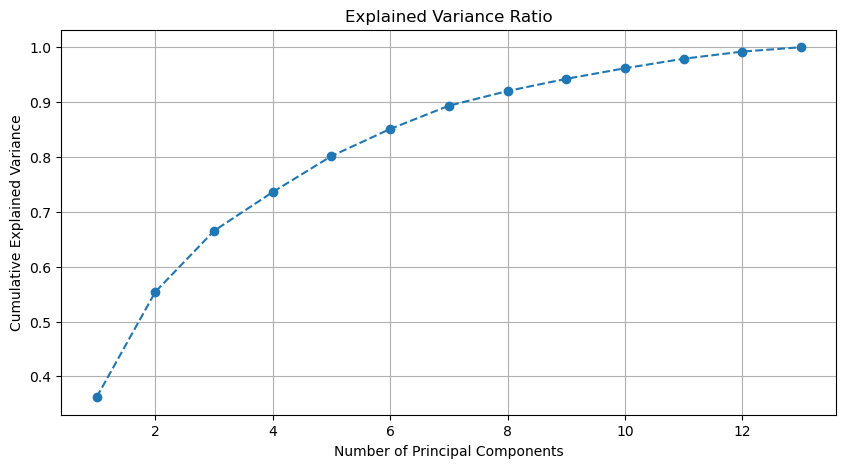

Number of components to retain: 10


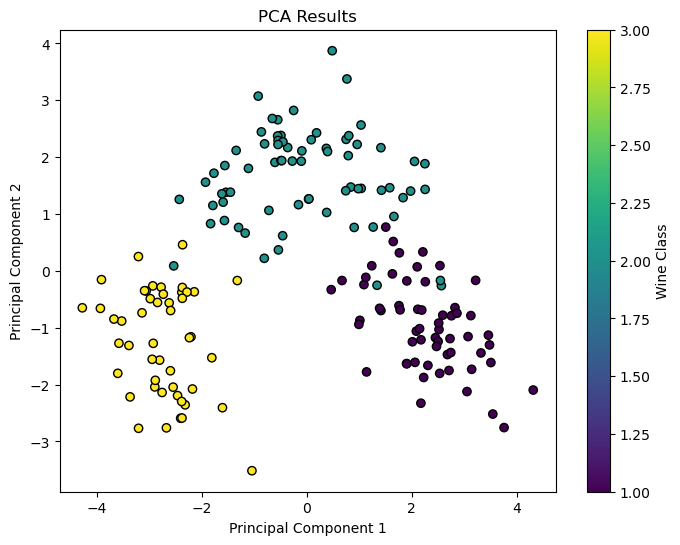

Silhouette Score: 0.2986748294369291


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Download the Wine dataset from UCI ML Repository and load it into a Pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ["Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", "OD280_OD315", "Proline"]
data = pd.read_csv(url, names=column_names)

# Split the dataset into features (X) and target variable (y)
X = data.drop("Class", axis=1)
y = data["Class"]

# Data preprocessing: Standardization (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components to retain based on explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualize explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Choose the number of components that explain a sufficient amount of variance
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components to retain: {n_components}")

# Perform PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.colorbar(label='Wine Class')
plt.show()

# Perform clustering on the PCA-transformed data using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Interpretation of results: You can analyze the cluster assignments and evaluate clustering performance here.

# You can create a report summarizing the PCA and clustering analysis separately in your Jupyter notebook.
# Additionally, calculate performance metrics for the clustering algorithm.

# Example of calculating performance metrics (e.g., silhouette score)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score

# Assuming you have already performed K-Means clustering and have cluster_labels
# cluster_labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)

# Create a DataFrame to store the performance metrics
performance_metrics = pd.DataFrame({
    'Metric': ['Silhouette Score'],
    'Value': [silhouette_avg]
})

# Display the table
print(performance_metrics)


             Metric     Value
0  Silhouette Score  0.298675
